## One versus all classifier

In [1]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm
mat_contents = scipy.io.loadmat('mnist', appendmat=True)

In [2]:
def plot_confusion_matrix(conf_matrix, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(conf_matrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    fmt = 'd'
    thresh = conf_matrix.max() / 2.
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            plt.text(j, i, format(conf_matrix[i, j], fmt),
                     ha="center", va="center",
                     color="white" if conf_matrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.show()

In [3]:
"""
train_x: (60000, 784)
train_y: (1, 60000)
number: An integer 0-9 to be predicted
return: weights (785, 1)
"""
def binary_classifier(train_x, train_y, number):
    # Add a bias term, making shape (60000, 785)
    train_x = np.column_stack((train_x, np.ones(len(train_x))))

    # Make all occurrences of number = 1, and all non-number = -1
    train_y = np.where(train_y == number, 1, -1).astype('int8')

    # Calculate psuedo inverse with shape (785, 60000)
    psuedo_inverse = np.linalg.pinv(train_x) 

    # return weights (785, 60000) * (60000, 1)
    return np.dot(psuedo_inverse, train_y.T)

In [16]:
"""
train_x: (60000, 784)
train_y: (1, 60000)
test_x: (10000, 784)
"""
def ova_classifier(train_x, train_y, test_x):
    # Add a bias term, making shape (10000, 785)
    test_x = np.column_stack((test_x, np.ones(len(test_x))))
    
    # Get a size 10 array of weights where array_of_weights[i] has size (785, 1)
    array_of_weights = np.array([binary_classifier(train_x, train_y, i) for i in tqdm(range(10), desc="Obtaining weights")])

    # Multiplying the weights by our test set
    # test_x[i]    * array_of_weights[i] = predictions[i]
    # (10000, 785) * (785, 1)            = (10000, 1)
    ova_preds = np.array([np.dot(test_x, array_of_weights[i]) for i in tqdm(range(10), desc="Obtaining predictions")])

    # Finding the maximum prediction index
    # Returning (10000,)
    return np.argmax(ova_preds, axis=0)

In [26]:
"""
preds: (10000, 1)
test_y: (1, 10000)
"""
def eval_ova_classifier(ova_preds, test_y):
    # Plot a confusion matrix
    conf_matrix = [[0 for _ in range(10)] for _ in range(10)]    
    for i in range(len(test_y[0])):
        conf_matrix[test_y[0][i]][ova_preds[i][0]] += 1
    conf_matrix = np.array(conf_matrix)
    class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    plot_confusion_matrix(conf_matrix, class_names)

    # Find the error rate
    correct = 0
    for i in range(10):
        for j in range(10):
            if i == j:
                correct += conf_matrix[i][j]
    acc = 100 * correct/10000
    print("Accuracy: {:.2f}%".format(acc, 2))
    print("Error rate: {:.2f}%".format(100 - acc, 2))

In [18]:
ova_train_x = np.array(mat_contents['trainX'])
ova_train_y = np.array(mat_contents['trainY'])
ova_test_x = np.array(mat_contents['testX'])
ova_test_y = np.array(mat_contents['testY'])

In [19]:
ova_preds = ova_classifier(ova_train_x, ova_train_y, ova_test_x)

Obtaining weights: 100%|█| 10/10 [01
Obtaining predictions: 100%|█| 10/10


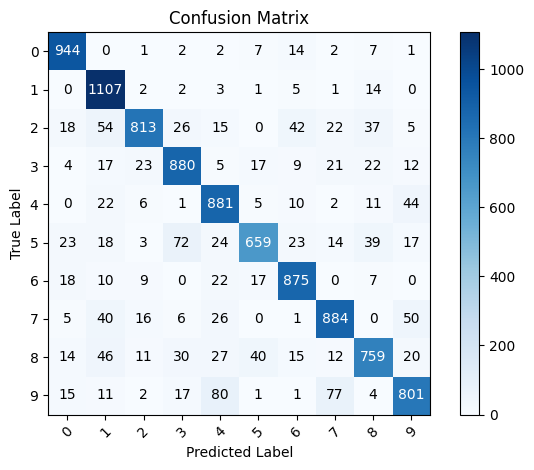

Accuracy: 86.03%
Error rate: 13.97%


In [27]:
eval_ova_classifier(ova_preds, ova_test_y)